<a href="https://colab.research.google.com/github/trprince21/STATS101C_notes/blob/main/Week1_Discussion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's observe the bias-variance trade-off with simulated data (bias in this case is the error with respect to our model of the data rather than biasedness in the coefficient estimation sense. $E[\hat{\beta}] = \beta$ vs $E[f(x) - \hat{f}(x)]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(1) # pseudo-number generator
n = 1000 # sample size: 1000

X = np.sort(10 * np.random.rand(n, 1), axis=0) # uniform random variable (0,10)
y = np.sin(X) + np.random.normal(0, 0.2, size= X.shape) # If we do size = n, we have a array (1000,1) + (1000,1)
print(X.shape)
print(y.shape)

(1000, 1)
(1000, 1)


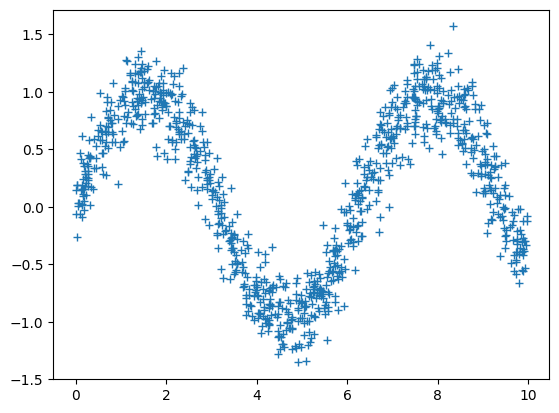

In [3]:
plt.plot(X,y,'+')
plt.show()



Take a second to find out how we might split the data into different parts. Let's try to get 20% of the data to be our test data and 80% to be our training data.











In [4]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train[:10])
print(y_train[:10])

[[3.94875613]
 [9.91346509]
 [9.82490945]
 [0.32426325]
 [5.26425934]
 [6.32615817]
 [0.15533276]
 [3.75091018]
 [3.45297462]
 [9.49016321]]
[[-0.98516869]
 [-0.29473225]
 [-0.02236554]
 [ 0.77735404]
 [-0.94702175]
 [-0.13490655]
 [ 0.1098617 ]
 [-0.40070565]
 [-0.35861482]
 [-0.25761143]]


Polynomial function (k) - 1 -> 40
Observe test_error for each of these functions

X ~ Uniform(0,10) \\
Y = sin(X) + N(0,0.2) \\
X = np.sort(10 * np.random.rand(n, 1), axis=0) \\
y = np.sin(X) + np.random.normal(0, 0.2, size= X.shape)

1
2
3
4
5
10
15
20
40


Text(0.5, 1.0, 'Bias-Variance Tradeoff')

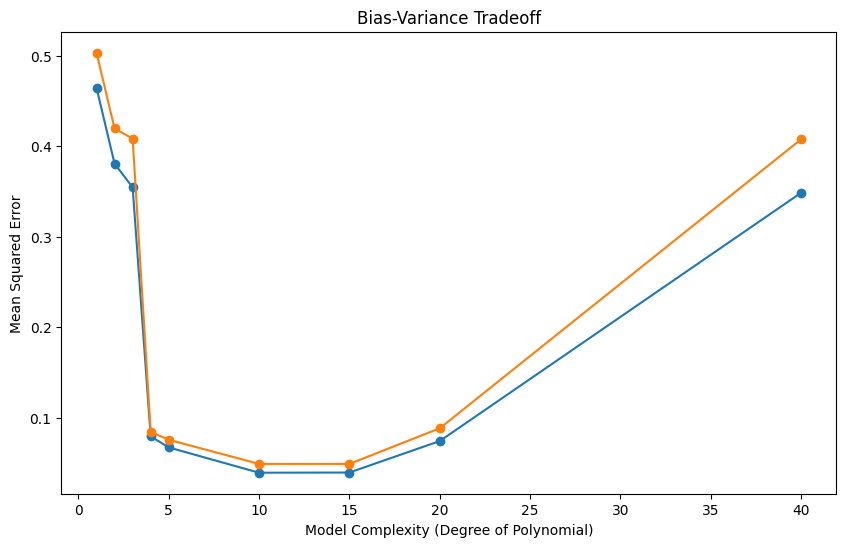

In [5]:

degrees = [1,2,3,4,5,10,15,20,40]
train_errors = []
test_errors = []

for k in degrees:
  print(k)
  poly = PolynomialFeatures(degree=k)
  X_poly_train = poly.fit_transform(X_train) # X_train, X_train^2, X_train^3
  X_poly_test = poly.transform(X_test)

  # Train linear regression on the transformed polynomial features
  model = LinearRegression()
  model.fit(X_poly_train, y_train) # -> y_train ~ X_train + X_train^2 + X_train^3 + intercept

  # Predict on training and test data
  y_train_pred = model.predict(X_poly_train) # training data predictions
  y_test_pred = model.predict(X_poly_test) # testing data predictions

  # Calculate Mean Squared Error (MSE) for both training and test sets
  train_errors.append(mean_squared_error(y_train, y_train_pred))
  test_errors.append(mean_squared_error(y_test, y_test_pred))


plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.xlabel('Model Complexity (Degree of Polynomial)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff')

# n = 50000, N = 1000
# y - Bias, Variance, x - degrees


Calculate bias and variance separately

Try polynomial regressions of degrees 1, 3, 5, 7, 9, 12, 20, 40 and create a list of test and train errors.

[0.46473505878379884, 0.35451407241524907, 0.06692137899854239, 0.039826148213412814, 0.03909111014628837, 0.038831393610783395, 0.0391654587909615, 0.07396295017222329]
[0.5034844034064198, 0.4084678438207392, 0.07540755870694152, 0.048792092204613995, 0.04888666825610311, 0.04869733762222226, 0.04872744848580556, 0.08812804583661946]


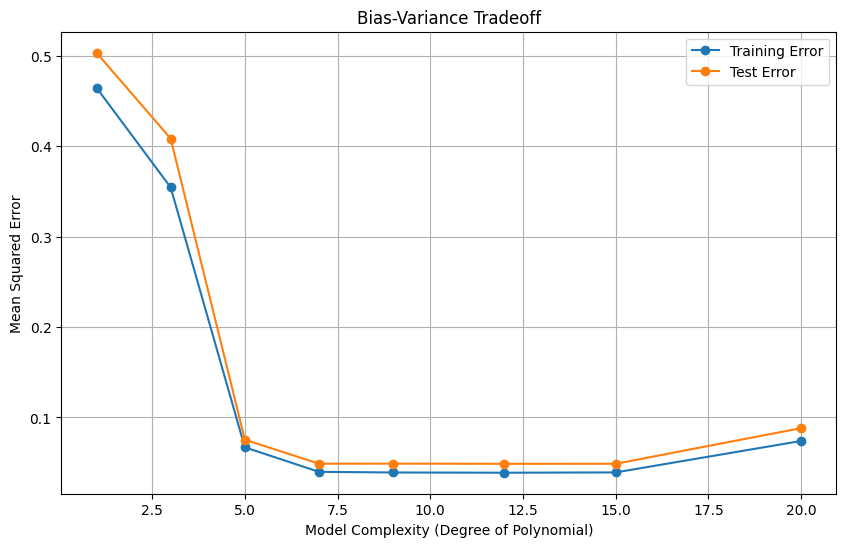

In [6]:
# Step 2: Fit polynomial models of varying degrees and calculate errors
degrees = [1, 3, 5, 7, 9, 12,15, 20]
train_errors = []
test_errors = []

for k in degrees:
    # Create polynomial features for the current degree
    poly = PolynomialFeatures(degree= k )
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Train linear regression on the transformed polynomial features
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)

    # Calculate Mean Squared Error (MSE) for both training and test sets
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

# Step 3: Plot the training and test errors to visualize bias-variance tradeoff
print(train_errors)
print(test_errors)
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.xlabel('Model Complexity (Degree of Polynomial)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)
plt.show()

In the discussion slides, Assignment 1 part 1 wants you to do this for multiple datasets and keep track of the bias and variance for:

n = 50000 samples
N = 1000 iterations
Functions = Polynomials of 1 to 7


Moving on to K-nearest neighbors. Classification problem, hyperparamter - k
X_train data - ([1,2],
                [.5,.3])
y_train data - labels (0,1)

x_test data ([1,3]) -> Find label y

- Train our KNN model
- When we get a new test X
- Calculate Euclidean distance of new test X from every single train X we have
- Sort this vector and find k closest points to our test X
- Find labels of k closest points -> majority class is our prediction

y_test -> true labels
y_predicted -> predicted labels

Accuracy measures:
Precision
Recall
F-1 score
Accuracy (Confusion matrices)

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [8]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 2,cluster_std = 4, random_state = 2)

<ipython-input-9-295b7bc11314>:2: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[:,0], X[:,1], c=y, marker= '+',s=100,edgecolors='black')


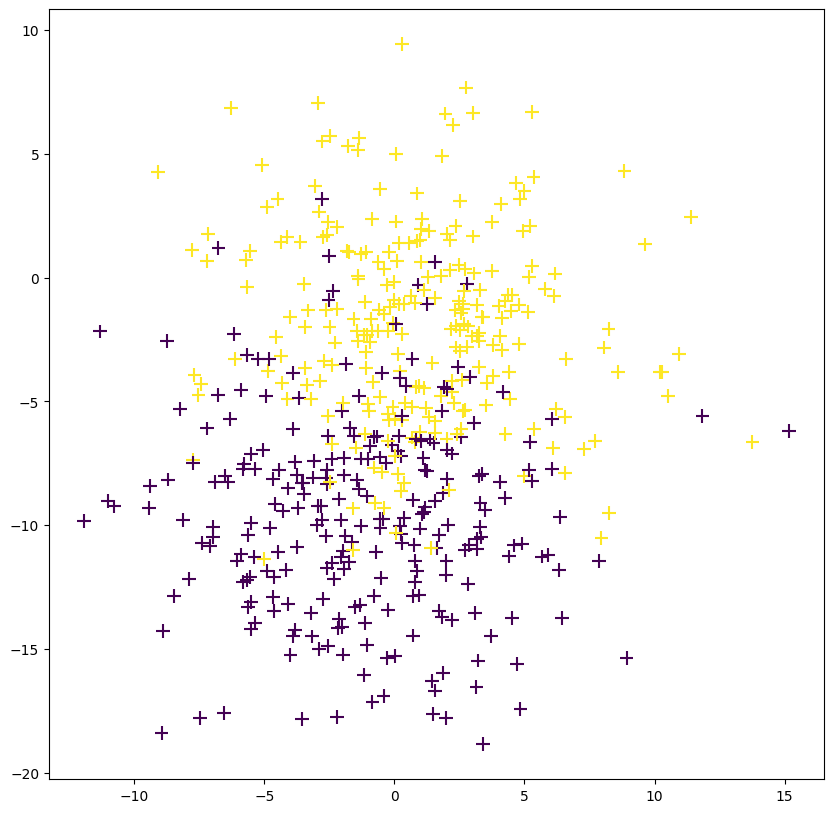

In [9]:
plt.figure(figsize = (10,10))
plt.scatter(X[:,0], X[:,1], c=y, marker= '+',s=100,edgecolors='black')
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# fit on my train data
# predictions on x_test data -> y_pred
# compare to y_test
print(X_train.shape)

(400, 2)


In [11]:
knn3 = KNeighborsClassifier(n_neighbors = 3)

knn3.fit(X_train, y_train)

y_pred_3 = knn3.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=3", accuracy_score(y_test, y_pred_3)*100)

Accuracy with k=3 78.0


How do we do this in a loop to get the graph on Page 17 of the Lec 1 Thursday notes?

In [13]:
accuracy = np.zeros(9)
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy[i-1] = accuracy_score(y_test, y_pred)
print(accuracy)

[0.75 0.73 0.78 0.76 0.82 0.8  0.8  0.78 0.81]


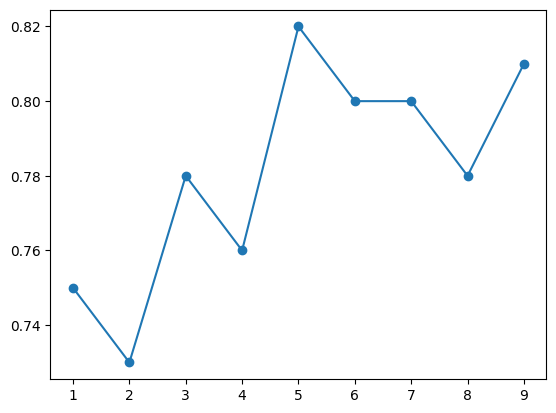

In [14]:
plt.plot(range(1,10), accuracy, marker = 'o')
plt.show()

In [15]:
from sklearn import metrics
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 2,cluster_std = 4, random_state = 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

actual = y_test
predicted = y_pred

#print("Accuracy with k=3", accuracy_score(y_test, y_pred)*100)
print(metrics.confusion_matrix(actual, predicted))





[[34 13]
 [ 9 44]]


Let's calculate precision and recall. Two arguably better accuracy measures over straight up accuracy. If we were asked to do this from scratch, what would be the right pseudocode


In class imbalanced datasets, accuracy can be misleading so we can output stuff like f1 scores, precision, recall

F1 - balance between precision and recall: $\frac{2}{1/precision + 1/recall}$

Precision - predicted positives that are actual positives/ predicted positives (44/(44+13))
Recall - Actual positives that were predicted positive/actual positives (44/(44+9))